In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Операции с векторами, матрицами. График произвольной функции от 1-й переменной

In [2]:
def scalar(vector1, vector2):
    assert len(vector1) == len(vector2)
    return sum(x * y for x, y in zip(vector1, vector2))


def norm(vector):
    return np.sqrt(sum(x**2 for x in vector))

def mul_matrix(matrix1, matrix2):
    assert len(matrix1[0]) == len(matrix2)
    return [
        [sum(matrix1[i][k] * matrix2[k][j] for k in range(len(matrix2[0])))
         for j in range(len(matrix2[0]))]
        for i in range(len(matrix1))
    ]

def mul_matrix_by_vector(matrix, vector):
    assert len(matrix[0]) == len(vector)
    return np.array([sum(matrix[i][j] * vector[j] for j in range(len(vector))) for i in range(len(matrix))])

def transpose_matrix(matrix):
    return [list(row) for row in zip(*matrix)]

def plot(function, x1, x2, step, x = None):
    x = [x for x in range(x1, x2 + step, step)] if x is None else x
    plt.plot(x, function(np.array(x)))
    plt.show()

#### Тестирование методов

In [3]:
vector1 = [1, 2, 3]
vector2 = [4, 5, 6]

print(scalar(vector1, vector2))
print(norm(vector2))

32
8.774964387392123


In [4]:
matrix1 = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
matrix2 = [[3, 4, 6], [1, 2, 7], [9, 8, 1]]
matrix3 = [[2, 3], [9, 4], [5, 6]]

print(mul_matrix(matrix1, matrix2))
print(mul_matrix_by_vector(matrix1, vector1))
print(transpose_matrix(matrix1))
print(transpose_matrix(matrix3))

[[32, 32, 23], [71, 74, 65], [110, 116, 107]]
[14 32 50]
[[1, 4, 7], [2, 5, 8], [3, 6, 9]]
[[2, 9, 5], [3, 4, 6]]


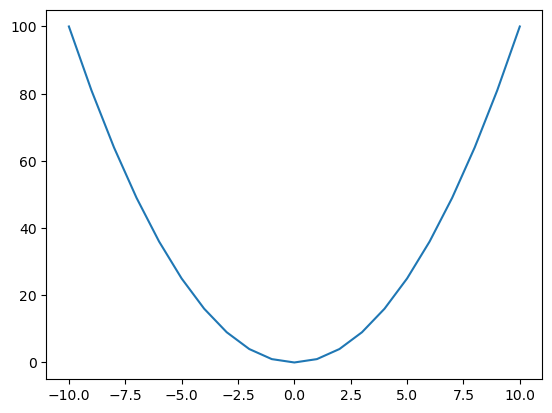

In [5]:
def f(x):
    return x**2

plot(f, -10, 10, 1)

#### Оценка погрешности

In [6]:
def S1(sqrt):
    return (sqrt - 1) ** 6

def S2(sqrt):
    return (3 - 2 * sqrt) ** 3

def S3(sqrt):
    return 99 - 70 * sqrt

def S1_derivative(sqrt):
    return  6 * (sqrt - 1) ** 5

def S2_derivative(sqrt):
    return -6 * (3 - 2 * sqrt) ** 2

def S3_derivative(sqrt):
    return -70

def V(S):
    return 4/3 * np.pi * S

R = 3

ways = {
    "S1": [S1, S1_derivative],
    "S2": [S2, S2_derivative],
    "S3": [S3, S3_derivative]
}

sqrts = {
    "7/5": 7/5,
    "17/12": 17/12
}

S_list = []
V_list = []
estimation_list = []
for way, func in ways.items():
    for sqrt, value in sqrts.items():
        S = func[0](value)
        V_calc = V(S)
        estimation =  abs(func[1](value) * (value - np.sqrt(2)) / S)
        S_list.append(S)
        V_list.append(V_calc)
        estimation_list.append(estimation * 100)


table = pd.DataFrame(
    {
        "Way": sorted(list(ways.keys()) * 2),
        "Sqrt":  list(sqrts.keys()) * 3,
        "S": S_list,
        "V": V_list,
        "Error estimation": estimation_list
    }
)
table

,Way,Sqrt,S,V,Error estimation
0,S1,7/5,0.004096,0.017157,21.320344
1,S1,17/12,0.005233,0.021919,3.532470
2,S2,7/5,0.008000,0.033510,42.640687
3,S2,17/12,0.004630,0.019393,8.831175
4,S3,7/5,1.000000,4.188790,99.494937
5,S3,17/12,-0.166667,-0.698132,103.030380
